In [1]:
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import

In [3]:
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European")

data_euro_1 = pd.read_csv('34187551-GCST90014288-GO_0007568.h.tsv.gz', sep='\t')
data_euro_2 = pd.read_csv('34187551-GCST90014289-GO_0007568.h.tsv.gz', sep='\t')
data_euro_3 = pd.read_csv('34187551-GCST90014290-GO_0007568.h.tsv.gz', sep='\t')
data_euro_4 = pd.read_csv('34187551-GCST90014292-GO_0007568.h.tsv.gz', sep='\t')

os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African")

data_afri_1 = pd.read_csv('34187551-GCST90014294-GO_0007568.h.tsv.gz', sep='\t')
data_afri_2 = pd.read_csv('34187551-GCST90014295-GO_0007568.h.tsv.gz', sep='\t')
data_afri_3 = pd.read_csv('34187551-GCST90014296-GO_0007568.h.tsv.gz', sep='\t')
data_afri_4 = pd.read_csv('34187551-GCST90014298-GO_0007568.h.tsv.gz', sep='\t')

# Index Creation

In [ ]:
def Create_Indices(data1, data2, data3, data4):
    
    # Resetting the index
    data1.index = np.arange(len(data1))
    data2.index = np.arange(len(data2))
    data3.index = np.arange(len(data3))
    data4.index = np.arange(len(data4))

    # Isolating chromosomes
    snp_index_1 = []
    snp_index_2 = []
    snp_index_3 = []
    snp_index_4 = []

    for i in range(23):
        snp_index_1.append(data1.hm_rsid.loc[np.where(data1.hm_chrom==i+1)])
        snp_index_2.append(data2.hm_rsid.loc[np.where(data2.hm_chrom==i+1)])
        snp_index_3.append(data3.hm_rsid.loc[np.where(data3.hm_chrom==i+1)])
        snp_index_4.append(data4.hm_rsid.loc[np.where(data4.hm_chrom==i+1)])
        
    snp_index_aloha = []

    for i in range(23):
        l1 = list(set(snp_index_1[i]).intersection(snp_index_2[i]))
        l2 = list(set(l1).intersection(snp_index_3[i]))
        l3 = list(set(l2).intersection(snp_index_4[i]))

        snp_index_aloha.append(pd.Series(l3).dropna())
    
    # Isolating SNP Subsets
    filtered_snp_index_1 = []
    filtered_snp_index_2 = []
    filtered_snp_index_3 = []
    filtered_snp_index_4 = []


    for i in range(23):
        filtered_snp_index_1.append(list(set(data1.hm_rsid.loc[np.where(data1.p_value<0.3)]).intersection(snp_index_aloha[i])))
        filtered_snp_index_2.append(list(set(data2.hm_rsid.loc[np.where(data2.p_value<0.3)]).intersection(snp_index_aloha[i])))
        filtered_snp_index_3.append(list(set(data3.hm_rsid.loc[np.where(data3.p_value<0.3)]).intersection(snp_index_aloha[i])))
        filtered_snp_index_4.append(list(set(data4.hm_rsid.loc[np.where(data4.p_value<0.3)]).intersection(snp_index_aloha[i])))
    
    snp_index_aloha_filtered = []
    for i in range(23):
        l1 = list(set(filtered_snp_index_1[i]).intersection(filtered_snp_index_2[i]))
        l2 = list(set(l1).intersection(filtered_snp_index_3[i]))
        l3 = list(set(l2).intersection(filtered_snp_index_4[i]))

        snp_index_aloha_filtered.append(pd.Series(l3).dropna())
        
    return(snp_index_aloha, snp_index_aloha_filtered)
    

# Data Export

In [12]:
def Export(data1, data2, data3, data4):
    
    snp_index_aloha, snp_index_aloha_filtered = Create_Indices(data1, data2, data3, data4)

    data1.index = data1.hm_rsid
    data2.index = data2.hm_rsid
    data3.index = data3.hm_rsid
    data4.index = data4.hm_rsid
    
    for CHROM in range(23):
    
    
        data_1_full = data1.loc[snp_index_aloha[CHROM]]
        data_2_full = data2.loc[snp_index_aloha[CHROM]]
        data_3_full = data3.loc[snp_index_aloha[CHROM]]
        data_4_full = data4.loc[snp_index_aloha[CHROM]]

        data_1_filtered = data1.loc[snp_index_aloha_filtered[CHROM]]
        data_2_filtered = data2.loc[snp_index_aloha_filtered[CHROM]]
        data_3_filtered = data3.loc[snp_index_aloha_filtered[CHROM]]
        data_4_filtered = data4.loc[snp_index_aloha_filtered[CHROM]]

    
    
    
    
        TRAIT_1_full = data_1_full[
        ['hm_other_allele','hm_effect_allele','beta','standard_error']
        ]
        TRAIT_1_full=TRAIT_1_full.rename(columns={
                                    "hm_other_allele":"allele_0",
                                    "hm_effect_allele":"allele_1",
                                    "beta":"trait1_b",
                                    "standard_error":'trait1_se'})
        TRAIT_2_full = data_2_full[
        ['beta','standard_error']
        ]
        TRAIT_3_full = data_3_full[
        ['beta','standard_error']
        ]
        TRAIT_4_full = data_4_full[
        ['beta','standard_error']
        ]

        S_XY_full = TRAIT_1_full
        S_XY_full['trait2_b']=TRAIT_2_full['beta']
        S_XY_full['trait2_se']=TRAIT_2_full['standard_error']
        S_XY_full['trait3_b']=TRAIT_3_full['beta']
        S_XY_full['trait3_se']=TRAIT_3_full['standard_error']
        S_XY_full['trait4_b']=TRAIT_4_full['beta']
        S_XY_full['trait4_se']=TRAIT_4_full['standard_error']


    
    
    
    
    
        TRAIT_1_filtered = data_1_filtered[
        ['hm_other_allele','hm_effect_allele','beta','standard_error']
        ]
        TRAIT_1_filtered=TRAIT_1_filtered.rename(columns={
                                    "hm_other_allele":"allele_0",
                                    "hm_effect_allele":"allele_1",
                                    "beta":"trait1_b",
                                    "standard_error":'trait1_se'})
        TRAIT_2_filtered = data_2_filtered[
        ['beta','standard_error']
        ]
        TRAIT_3_filtered = data_3_filtered[
        ['beta','standard_error']
        ]
        TRAIT_4_filtered = data_4_filtered[
        ['beta','standard_error']
        ]

        S_XY_filtered = TRAIT_1_filtered
        S_XY_filtered['trait2_b']=TRAIT_2_filtered['beta']
        S_XY_filtered['trait2_se']=TRAIT_2_filtered['standard_error']
        S_XY_filtered['trait3_b']=TRAIT_3_filtered['beta']
        S_XY_filtered['trait3_se']=TRAIT_3_filtered['standard_error']
        S_XY_filtered['trait4_b']=TRAIT_4_filtered['beta']
        S_XY_filtered['trait4_se']=TRAIT_4_filtered['standard_error']
    
    
        #S_XY Export
        S_XY_full.to_csv('Jupyter_Exports/Meta/S_XY_full{}.csv'.format(CHROM),index=True)
        S_XY_filtered.to_csv('Jupyter_Exports/Meta2/S_XY_filtered{}.csv'.format(CHROM),index=True)
        
        print("Chromosom {} complete".format(CHROM))

## Function Execution

# Subset Creation

In [ ]:
def Create_Subsets(data1, data2, data3, data4):
    
    snp_index_aloha, snp_index_aloha_filtered = Create_Indices(data1, data2, data3, data4)
    
    data1.index = data1.hm_rsid
    data2.index = data2.hm_rsid
    data3.index = data3.hm_rsid
    data4.index = data4.hm_rsid
    
    Created_Subsets = []
    
    for CHROM in range(23):
    
  

        data_1_filtered = data1.loc[snp_index_aloha_filtered[CHROM]]
        data_2_filtered = data2.loc[snp_index_aloha_filtered[CHROM]]
        data_3_filtered = data3.loc[snp_index_aloha_filtered[CHROM]]
        data_4_filtered = data4.loc[snp_index_aloha_filtered[CHROM]]


        TRAIT_1_filtered = data_1_filtered[
        ['hm_other_allele','hm_effect_allele','beta','standard_error']
        ]
        TRAIT_1_filtered=TRAIT_1_filtered.rename(columns={
                                    "hm_other_allele":"allele_0",
                                    "hm_effect_allele":"allele_1",
                                    "beta":"trait1_b",
                                    "standard_error":'trait1_se'})
        TRAIT_2_filtered = data_2_filtered[
        ['beta','standard_error']
        ]
        TRAIT_3_filtered = data_3_filtered[
        ['beta','standard_error']
        ]
        TRAIT_4_filtered = data_4_filtered[
        ['beta','standard_error']
        ]

        S_XY_filtered = TRAIT_1_filtered
        S_XY_filtered['trait2_b']=TRAIT_2_filtered['beta']
        S_XY_filtered['trait2_se']=TRAIT_2_filtered['standard_error']
        S_XY_filtered['trait3_b']=TRAIT_3_filtered['beta']
        S_XY_filtered['trait3_se']=TRAIT_3_filtered['standard_error']
        S_XY_filtered['trait4_b']=TRAIT_4_filtered['beta']
        S_XY_filtered['trait4_se']=TRAIT_4_filtered['standard_error']
    
    
     
        Created_Subsets.append(S_XY_filtered)
        
        print("Chromosome {} complete".format(CHROM+1))
        
    return(Created_Subsets)

# Function Execution

### European cohort

In [ ]:
Export(data_euro_1,data_euro_2,data_euro_3,data_euro_4)

In [ ]:
Euro_Subsets = Create_Subsets(data_euro_1, data_euro_2, data_euro_3, data_euro_4)

### African American cohort

In [ ]:
Export(data_afri_1,data_afri_2,data_afri_3,data_afri_4)

In [ ]:
Afri_Subsets = Create_Subsets(data_afri_1, data_afri_2, data_afri_3, data_afri_4)

# Results Import

In [5]:
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/Meta_Analysis")

result = []
p_value = []
significant_p_value = []
for CHROM in range(23):
    results = pd.read_csv('0.15/0.15_Meta_Results_Chrom_{}.csv'.format(CHROM+1),index_col=0)
    
    p_values = 10**(-results['-log10(p-val)'])
    p_value.append(p_values)
    print("Number of significant associations in Chromosome {} BEFORE correction: ".format(CHROM+1)
          ,len(p_values.iloc[np.where(p_values<0.05)]))
    
    adjusted_p_values = p_values*len(data1)
    significant_p_value.extend(results.index[np.where(adjusted_p_values<0.05)])

    p_values_corrected = adjusted_p_values.iloc[np.where(adjusted_p_values<0.05)]
    print("Number of significant associations in Chromosome {} AFTER correction: ".format(CHROM+1),len(p_values_corrected))

Number of significant associations in Chromosome 1 BEFORE correction:  22
Number of significant associations in Chromosome 1 AFTER correction:  0
Number of significant associations in Chromosome 2 BEFORE correction:  7
Number of significant associations in Chromosome 2 AFTER correction:  0
Number of significant associations in Chromosome 3 BEFORE correction:  118
Number of significant associations in Chromosome 3 AFTER correction:  92
Number of significant associations in Chromosome 4 BEFORE correction:  7
Number of significant associations in Chromosome 4 AFTER correction:  0
Number of significant associations in Chromosome 5 BEFORE correction:  3
Number of significant associations in Chromosome 5 AFTER correction:  0
Number of significant associations in Chromosome 6 BEFORE correction:  21
Number of significant associations in Chromosome 6 AFTER correction:  0
Number of significant associations in Chromosome 7 BEFORE correction:  13
Number of significant associations in Chromosome 7 

# Published Associations

In [44]:
response = requests.get('https://www.ebi.ac.uk/gwas/rest/api/efoTraits/GO_0007568/associations')
GWAS_EBI=response.json()

In [45]:
published_snps=[]
for i in range(len(GWAS_EBI['_embedded']['associations'])):
    published_snps.append(GWAS_EBI['_embedded']['associations'][i]['loci'][0]['strongestRiskAlleles'][0]['riskAlleleName'])
    
print("Number of PUBLISHED significant associations: ",len(published_snps))

Number of PUBLISHED significant associations:  209


# Plotting GWAS

Text(0.5, 0, 'Chromosome ID')

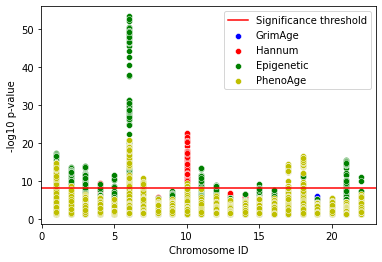

In [21]:
data1.index = data1.hm_rsid
data2.index = data2.hm_rsid
data3.index = data3.hm_rsid
data4.index = data4.hm_rsid

plt.figure(figsize=(15,5))

sns.scatterplot(x=data1.loc[list(filtered_snp_index_1[0])].hm_chrom,y=-np.log10(data1.loc[list(filtered_snp_index_1[0])].p_value),color='b',label="GrimAge")
sns.scatterplot(x=data2.loc[list(filtered_snp_index_2[0])].hm_chrom,y=-np.log10(data2.loc[list(filtered_snp_index_2[0])].p_value),color='r',label="Hannum")
sns.scatterplot(x=data3.loc[list(filtered_snp_index_3[0])].hm_chrom,y=-np.log10(data3.loc[list(filtered_snp_index_3[0])].p_value),color='g',label="Epigenetic")
sns.scatterplot(x=data4.loc[list(filtered_snp_index_4[0])].hm_chrom,y=-np.log10(data4.loc[list(filtered_snp_index_4[0])].p_value),color='y',label="PhenoAge")

for i in range(22):
    sns.scatterplot(x=data1.loc[list(filtered_snp_index_1[i+1])].hm_chrom,y=-np.log10(data1.loc[list(filtered_snp_index_1[i+1])].p_value),color='b')#,label="GrimAge")
    sns.scatterplot(x=data2.loc[list(filtered_snp_index_2[i+1])].hm_chrom,y=-np.log10(data2.loc[list(filtered_snp_index_2[i+1])].p_value),color='r')#,label="Hannum")
    sns.scatterplot(x=data3.loc[list(filtered_snp_index_3[i+1])].hm_chrom,y=-np.log10(data3.loc[list(filtered_snp_index_3[i+1])].p_value),color='g')#,label="Epigenetic")
    sns.scatterplot(x=data4.loc[list(filtered_snp_index_4[i+1])].hm_chrom,y=-np.log10(data4.loc[list(filtered_snp_index_4[i+1])].p_value),color='y')#,label="PhenoAge")

plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-',label = "Significance threshold")
plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

# Plotting metaCCA Results

In [ ]:
import seaborn as sns
data1.index = data1.hm_rsid
plt.figure(figsize=(15,5))
for CHROM in range(23):
    sns.scatterplot(x=data1.loc[p_value[CHROM].index].hm_chrom,y=-np.log10(p_value[CHROM]),color='b')#label="Chromosome {}".format(CHROM+1))
plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-', label = "Significance threshold")
#plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

# Detecting Novel Associations

In [ ]:
significant_snps_gwas = []
significant_snps_gwas.extend(data_euro_1.hm_rsid.iloc[np.where(data_euro_1.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_euro_2.hm_rsid.iloc[np.where(data_euro_2.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_euro_3.hm_rsid.iloc[np.where(data_euro_3.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_euro_4.hm_rsid.iloc[np.where(data_euro_4.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_1.hm_rsid.iloc[np.where(data_afri_1.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_2.hm_rsid.iloc[np.where(data_afri_2.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_3.hm_rsid.iloc[np.where(data_afri_3.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_4.hm_rsid.iloc[np.where(data_afri_4.p_value*len(data_euro_1)<0.05)])

In [20]:
main_list = list(set(significant_p_value) - set(significant_snps_gwas))

In [21]:
print('Novel associations: ',main_list)

[]

# P-values of novel associations

In [120]:
sig_p_value = []
for i in range(23):
    for j in range(len(main_list)):
        try:sig_p_value.append(p_value[i][main_list[j]]*len(data1))
        except:KeyError
        pass

In [121]:
main_list + sig_p_value

['rs7750641',
 'rs130076',
 'rs3130455',
 'rs3131006',
 'rs3132568',
 'rs1619179',
 'rs3130564',
 0.005337506358014958,
 0.031750794764908705,
 0.03425847373185285,
 0.022699319855000913,
 0.020846918567109702,
 0.003910327480578295,
 0.01718391231609864]

In [123]:
final_results_table = pd.DataFrame()
final_results_table['rsid']=main_list
final_results_table['p_value']=sig_p_value


In [124]:
final_results_table

,rsid,p_value
0,rs7750641,0.005338
1,rs130076,0.031751
2,rs3130455,0.034258
3,rs3131006,0.022699
4,rs3132568,0.020847
5,rs1619179,0.003910
6,rs3130564,0.017184
